# O que é Machine Learning

Machine Learning pode ser definido de algumas maneiras:

- Pela definição, Machine Learning é a teoria e o desenvolvmento de sistemas computacionais capazes de executar tarefas que normalmente requerem inteligência humana, como percepção visual, reconhecimento de fala, tomada de decisão e tradução entre idiomas.

- Também pode ser definida como a capacidade dos computadores de imitar funções cognitivas humanas, como aprendizado e solução de problemas.

- Academicamente é o estudo de agentes que recebem percepções do ambiente e performam ações.

## Classificação dos algorítimos

Paradigma
Machinelârnico
- Árvores de decisão
- Bagging
- Boosting
- K-NN
- Redes Neurais
- Support Vector Machines

Paradigma
Estatístico
- Regressão
- GLM
- GLMM
- ANOVA

Supervisionados
- Regressão
- GLM
- GLMM
- Support vector machines
- Naive Bayes
- K-nearest neighbors
- Redes Neurais
- Decision Trees

Não supervisionados
- K-Means
- Métodos hierárquicos
- Mistura Gaussiana
- DBScan
- Mini-Batch-K-Means

Resposta contínua
- Regressão
- GLM
- GLMM
- Support vector machines
- K-nearest neighbors
- Redes Neurais
- Regression Trees

Resposta discreta
- Regressão logística
- Classification trees
- Redes Neurais
- GLM
- GLMM

## Objetivos do algoritmo de Machine Learning

- Classificar da melhor forma possível a variável resposta
    - Através de segmentações
    - Usando variáveis explicativas

- Obter insights
    - Das relações enre variável resposta e as variáveis e as explicativas
    - Explorar interações

# Redes Neurais x Random Forest x Regressão Logística

Se você deseja um modelo de Machine Learning que produza uma **probabilidade como saída** e tem **variáveis numéricas como entrada**, o modelo mais apropriado depende do problema e dos requisitos específicos, mas aqui estão as opções mais comuns:

---

## 1. **Para classificação (output: probabilidade de classes)**
Se você está resolvendo um problema de classificação, onde deseja prever a probabilidade de uma amostra pertencer a uma classe específica, os modelos a seguir são recomendados:

### **a) Regressão Logística**  
- **Descrição:** É um modelo simples, interpretável e eficaz para problemas de classificação binária (ou com algumas adaptações, multiclasse). A saída é uma probabilidade, geralmente usando a função sigmoide para binário ou softmax para multiclasse.
- **Indicação:** Funciona bem quando os dados têm uma relação linear ou quase linear entre as variáveis de entrada e o logit (log das odds).
- **Ferramentas:** Disponível no `scikit-learn` (`LogisticRegression`).

---

### **b) Árvores de Decisão Baseadas em Probabilidades (como Random Forest e Gradient Boosting)**  
- **Descrição:** Modelos como **Random Forest**, **XGBoost**, **LightGBM** ou **CatBoost** fornecem probabilidades como saída, calculando a proporção de votos das árvores para cada classe.
- **Indicação:** Útil para problemas mais complexos, com muitas variáveis ou relações não lineares entre os dados. Esses modelos geralmente superam a regressão logística em cenários com padrões mais complicados.
- **Ferramentas:**
  - **Random Forest**: `RandomForestClassifier` no `scikit-learn`.
  - **XGBoost/LightGBM**: Implementações específicas disponíveis nas bibliotecas `xgboost` e `lightgbm`.

---

### **c) Redes Neurais (MLPs - Multi-Layer Perceptrons)**  
- **Descrição:** Para entradas numéricas, você pode usar uma rede neural feedforward com uma camada de saída que usa:
  - **Função Sigmoide** (para problemas binários, output de 0 a 1).
  - **Função Softmax** (para problemas multiclasse, output como vetor de probabilidades para cada classe).
- **Indicação:** Ideal para problemas com grande quantidade de dados e complexidade que não pode ser capturada por modelos simples. Pode ser exagerado para problemas pequenos ou simples.
- **Ferramentas:** Bibliotecas como `TensorFlow` ou `PyTorch`.

---

## 2. **Para regressão (output: valor contínuo interpretado como probabilidade)**  
Se o objetivo é prever um valor contínuo que **represente uma probabilidade diretamente** (ex.: chance de algo acontecer entre 0 e 1), você pode usar modelos de regressão direta, mas com ajustes:

### **a) Regressão Linear com Restrições**
- Ajuste o modelo para garantir que as previsões fiquem no intervalo `[0, 1]`. Isso pode ser feito, por exemplo, aplicando uma função sigmoide à saída.

### **b) Redes Neurais**
- Para outputs contínuos, use uma rede neural com uma camada de saída usando a função **sigmoide**, garantindo que os valores fiquem no intervalo `[0, 1]`.

### **c) Modelos Ensemble (como Gradient Boosting ou Random Forest)**
- Você pode ajustar um modelo ensemble (como **XGBoost**) para prever valores contínuos entre 0 e 1 e interpretá-los como probabilidades.

---

## Resumo da Escolha:
- **Problema Simples e Interpretação Importante:** Regressão Logística.
- **Problema Não Linear ou Complexo:** Random Forest, XGBoost, LightGBM ou CatBoost.
- **Problema Muito Grande ou Complexo:** Redes Neurais (MLPs).
- **Regressão com Probabilidades Contínuas:** Ajuste modelos como regressão linear ou redes neurais com função sigmoide na saída.

# Árvores de Decisão

Aplicações:

- Eficácia de uma vacina
- Cliente vai pagar um empréstimo
- Cliente vai comprar meu produto?
- Quantidade de petróleo num poço

## Implementação no Python

### Script 01

#### Importação dos pacotes

In [4]:
# Importações necessárias no arquivo 00
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para separar treino e teste
# Métricas de avaliação do modelo programadas no scikit
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix, balanced_accuracy_score

# Classe de árvore e funções auxiliares
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#%%  Funções Auxiliares

from funcoes_ajuda import descritiva, relatorio_missing


#### Carregando a base de dados

`pclass` - número da classe\
`deck` -  deck em que estava\
`embark_town` - cidade a qual embarcou\
`alive` - se o paciente sobreviveu\
`alone` - se o paciente estava sozinho\
`subsp` - pais ou filhos à bordo

In [8]:
#%%  Carregar os dados
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
for column in ['survived', 'pclass', ]:
    titanic[column] = titanic[column].astype("category")

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(2), object(5)
memory usage: 68.7+ KB


In [16]:
titanic.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [17]:
for variavel in ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 
                 'adult_male', 'deck', 'embark_town', 'alive', 'alone']:
    print(f'\n\nFrequencias da variável: {variavel}')
    print(titanic[variavel].value_counts(dropna=False).sort_index())
    



Frequencias da variável: pclass
pclass
1    216
2    184
3    491
Name: count, dtype: int64


Frequencias da variável: sex
sex
female    314
male      577
Name: count, dtype: int64


Frequencias da variável: sibsp
sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


Frequencias da variável: parch
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


Frequencias da variável: embarked
embarked
C      168
Q       77
S      644
NaN      2
Name: count, dtype: int64


Frequencias da variável: class
class
First     216
Second    184
Third     491
Name: count, dtype: int64


Frequencias da variável: who
who
child     83
man      537
woman    271
Name: count, dtype: int64


Frequencias da variável: adult_male
adult_male
False    354
True     537
Name: count, dtype: int64


Frequencias da variável: deck
deck
A       15
B       47
C       59
D       33
E       32
F       13
G        4
NaN    688
Name: count, 

#### Análise gráfica

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


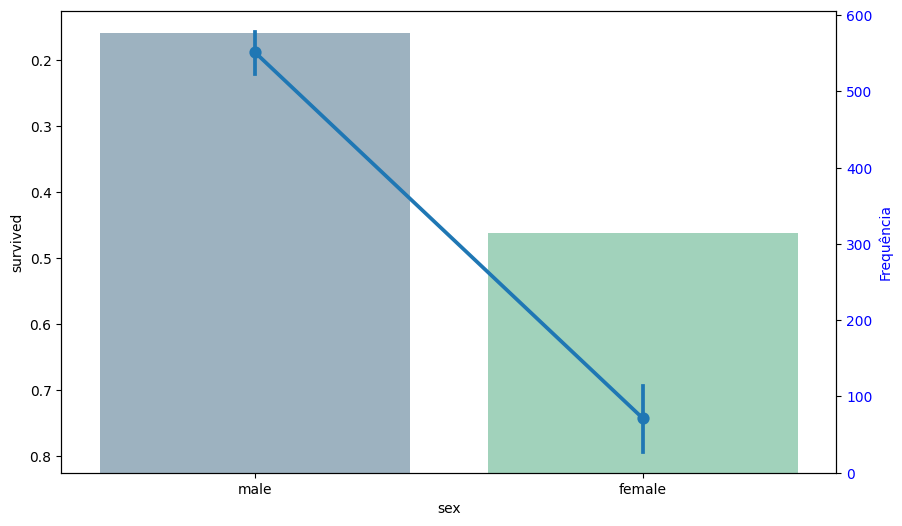

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


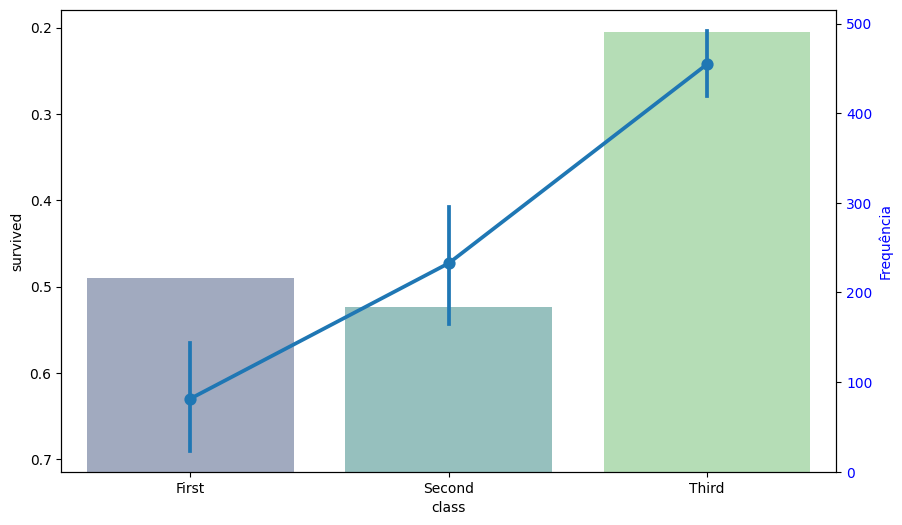

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


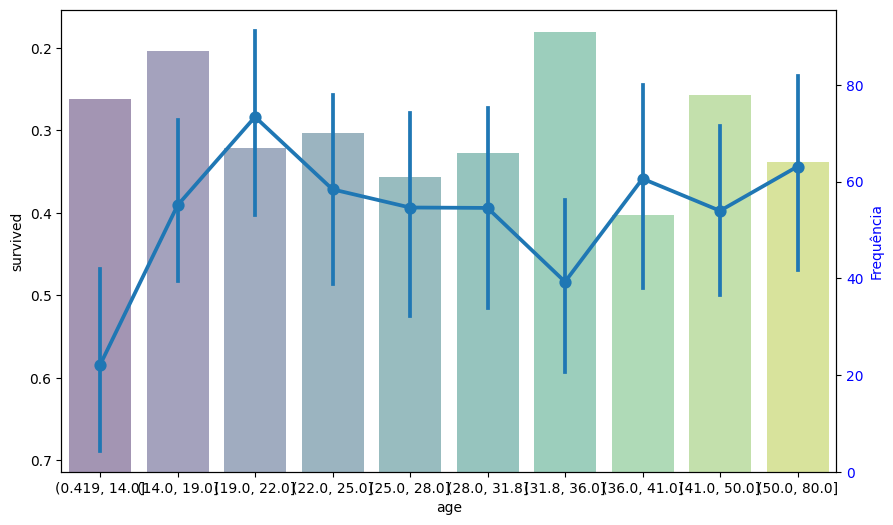

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


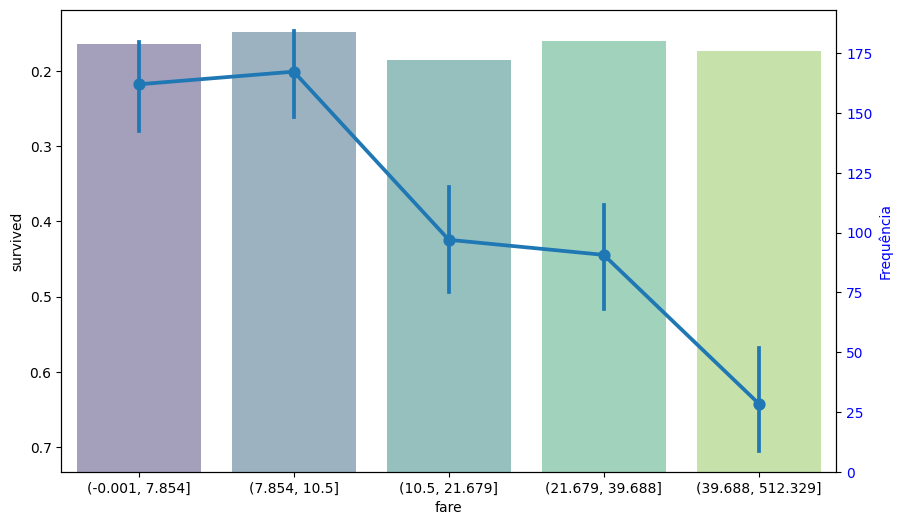

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


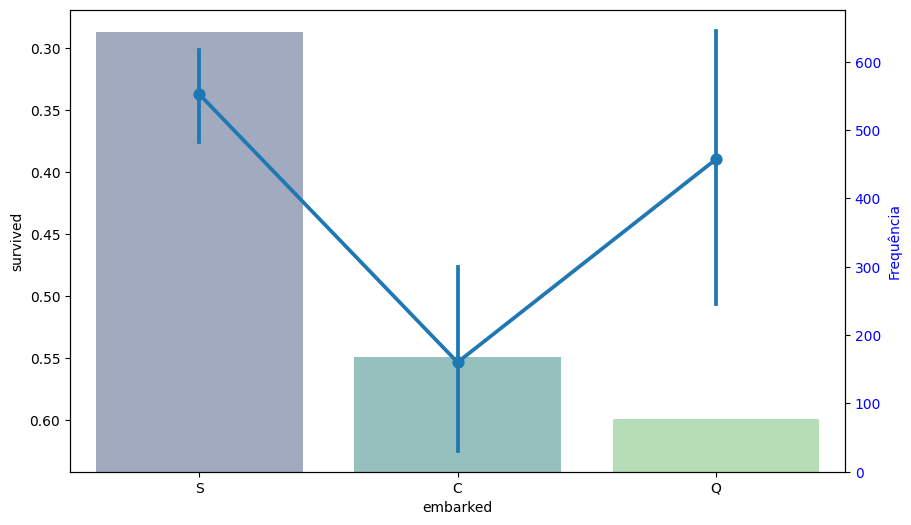

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


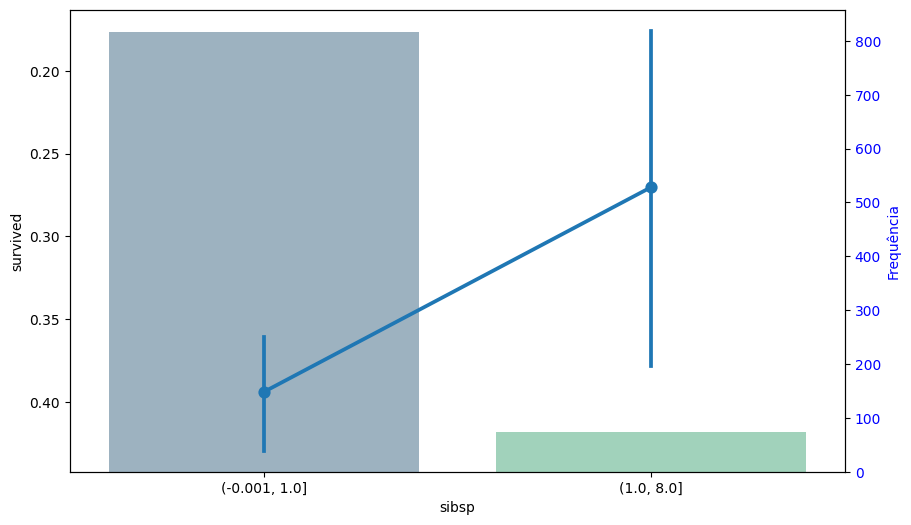

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


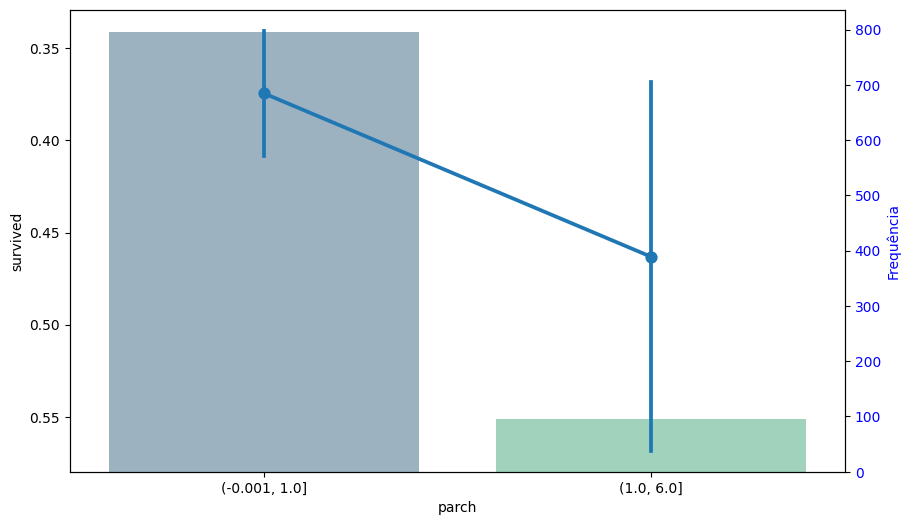

In [18]:
#%%
descritiva(titanic, "sex")
descritiva(titanic, "class")
descritiva(titanic, "age", max_classes=10)
descritiva(titanic, "fare", max_classes=5)
descritiva(titanic,"embarked")
descritiva(titanic,"sibsp")
descritiva(titanic,"parch")

#### Tratando dados

In [19]:
#%% Avaliar dados faltantes

# A função tem basicamenteum compilado desses comandos:
# titanic.isna().sum()
# titanic.isna().mean().apply(lambda x: f"{x:.1%}".)
relatorio_missing(titanic)

Número de linhas: 891 | Número de colunas: 15


,Pct_missing,Freq_missing
survived,0.0%,0
pclass,0.0%,0
sex,0.0%,0
age,19.9%,177
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
embarked,0.2%,2
class,0.0%,0
who,0.0%,0


In [20]:
#%% Tratar variável age

titanic['age'] = titanic.age.fillna(titanic.age.mean())

#%% Remover variáveis redundantes
titanic.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town', 
                      'alive', 'alone'], inplace=True)

In [21]:
#%% Verificar variáveis string

metadados = titanic.dtypes

print('\nVariávels string:')
print(metadados[metadados == 'object'])

metadados


Variávels string:
sex         object
embarked    object
dtype: object


survived    category
pclass      category
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
dtype: object

#### Processo de dummyzação

In [27]:
#%% Transformar variáveis string em dummies

# No pandas, um método prático de fazer isto é com o get_dummies
titanic_dummies = pd.get_dummies(titanic, drop_first=True)

In [28]:
# Conferir a estrutura da tabela
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         891 non-null    float64
 1   sibsp       891 non-null    int64  
 2   parch       891 non-null    int64  
 3   fare        891 non-null    float64
 4   survived_1  891 non-null    bool   
 5   pclass_2    891 non-null    bool   
 6   pclass_3    891 non-null    bool   
 7   sex_male    891 non-null    bool   
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(6), float64(2), int64(2)
memory usage: 33.2 KB


In [29]:
# Checar primeiras 3 linhas
titanic_dummies.head(3)

,age,sibsp,parch,fare,survived_1,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
0,22.0,1,0,7.2500,False,False,True,True,False,True
1,38.0,1,0,71.2833,True,False,False,False,False,False
2,26.0,0,0,7.9250,True,False,True,False,False,True


#### Salvando objetos

In [30]:
#%% Salvando a base tratada

# O pkl é um formato do Python, que vai manter todas as propriedades do objeto
titanic_dummies.to_pickle('titanic1.pkl')
# Parquet é um formato popular, eficiente, compatível com outras plataformas
titanic_dummies.to_parquet('titanic1.parquet')

#### Gerando a Árvore

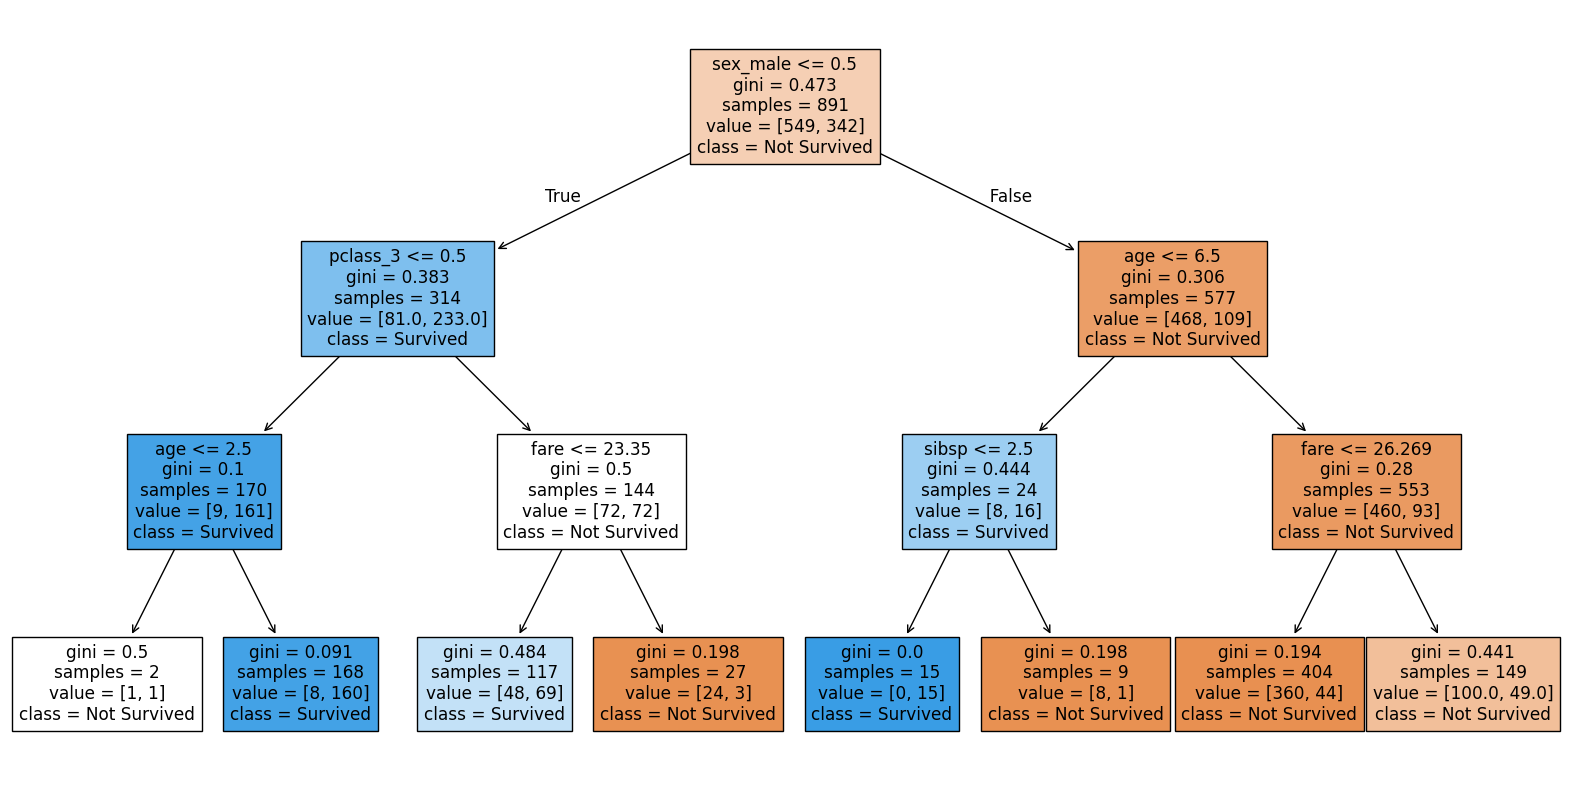

In [31]:
#%%  Rodando a primeira árvore

# No Scikitlearn, vamos usar a seguinte estrutura:
    
# Um objeto X com as variáveis explicativas (miúsculo por serem várias)
X = titanic_dummies.drop(columns = ['survived_1'])
# Um objeto y com a variável resposta (target) minúsculo por ser só 1
y = titanic_dummies['survived_1']

# Estanciar a classe da árvore de decisão em um objeto chamado arvore
# Este objeto não possui os dados em um primeiro momento
# Mas ela possui todos os atributos e métodos que precisaremos
arvore = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=42)

# Treinar o modelo com o método .fit(). Aqui processamos os dados!
arvore.fit(X, y)

# OBS: O objeto árvore contémodos os atributos e métodos que precisamos
# Vamos usar esse objeto para várias coisas como:
#    visualizar as regras da árvore, avaliar a árvore, classificar novas linhas

#%%  Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(arvore, feature_names=X.columns.tolist(), class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


Uma árvore é como se fosse um mapa para mostrar as decisões, ou escolhas. No início de cada quadro há uma pergunta, por exemplo, `sex_male` na primeira. Se a dummy for 0, quer dizer que é mulher, e se for 1 quer dizer que é homem, e assim por diante.

In [33]:
#%%  Novos dados

# Suponha que temos novos dados para classiicar
novos_dados = X.tail() # como exemplo, vamos classificar as 5 últimas linhas
novos_dados

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
886,27.000000,0,0,13.00,True,False,True,False,True
887,19.000000,0,0,30.00,False,False,False,False,True
888,29.699118,1,2,23.45,False,True,False,False,True
889,26.000000,0,0,30.00,False,False,True,False,False
890,32.000000,0,0,7.75,False,True,True,True,False


In [34]:
#%%  Classificando com a árvore

# Predict é o método que classifica as novas observações
#    Lembrete: a classificação é pela classe mais frequente da folha
classificação_novos_dados = arvore.predict(novos_dados)
classificação_novos_dados

array([False,  True, False, False, False])

In [35]:
# Guardar a classificação da árvore 
classificação_treino = arvore.predict(X)

# Comparar com os valores reais por uma tabela cruzada
print(pd.crosstab(classificação_treino, y, margins=True))
print(pd.crosstab(classificação_treino, y, normalize='index'))
print(pd.crosstab(classificação_treino, y, normalize='columns'))

acertos = classificação_treino == y
pct_acertos = acertos.sum()/acertos.shape[0]
print(f'Acurácia (taxa de acerto): {pct_acertos:.2%}')

survived_1  False  True  All
row_0                       
False         493    98  591
True           56   244  300
All           549   342  891
survived_1     False     True 
row_0                         
False       0.834179  0.165821
True        0.186667  0.813333
survived_1     False    True 
row_0                        
False       0.897996  0.28655
True        0.102004  0.71345
Acurácia (taxa de acerto): 82.72%


#### Plotando a matriz de confusão


A acurácia da árvore é: 82.7%
A acurácia balanceada da árvore é: 80.6%


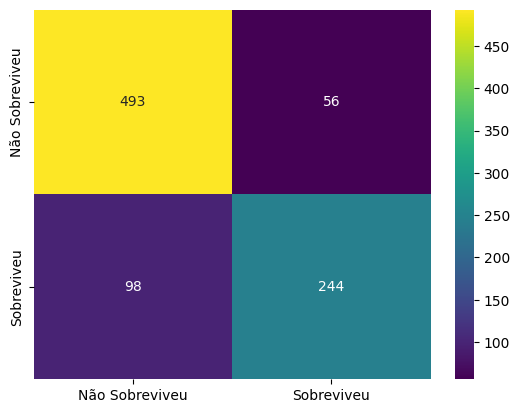

In [36]:
# Calculando acurácia e matriz de confusão

# Vamos avaliar o modelo com algumas funções próprias do Scikit-Learn
# A função confudion_matrix faz basicamente a comparação acima
cm = confusion_matrix(y, arvore.predict(X))
# accuracy_score calcula o percentual de acertos
ac = accuracy_score(y, arvore.predict(X))
# Essa função pondera para forçar a distribuição da target como uniforme
bac = balanced_accuracy_score(y, arvore.predict(X))

print(f'\nA acurácia da árvore é: {ac:.1%}')
print(f'A acurácia balanceada da árvore é: {bac:.1%}')

# Visualização gráfica
sns.heatmap(cm, 
            annot=True, fmt='d', cmap='viridis', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

**Nota**: Acurácia balanceada é uma forma de dar pesos para as observações que são mais raras

In [37]:
# Relatório de classificação do Scikit
print('\n', classification_report(y, arvore.predict(X)))





               precision    recall  f1-score   support

       False       0.83      0.90      0.86       549
        True       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.83      0.83      0.82       891



## Script 02

### Importação dos pacotes

In [38]:
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from funcoes_ajuda import avalia_clf


### Carregando os dados

In [40]:
#%% Carregando a base

titanic = pd.read_pickle('titanic1.pkl')
# titanic = pd.read_parquet('titanic1.parquet')

#%%  Dividindo a base em treino e teste

# Selecionar variáveis preditoras e a variável resposta
X = titanic.drop(columns = ['survived_1'])
y = titanic['survived_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

# conferindo número de linhas e colunas
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(668, 9)
(668,)
(223, 9)
(223,)


### Treinando a árvore

In [42]:
#%% Treinando a árvore

# Criar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(criterion='gini', 
                                max_depth = 3, 
                                random_state=42)

# Treinar o modelo
arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 84.4%
A acurácia balanceada da árvore é: 81.1%
AUC-ROC: 87.54%
GINI: 75.08%

               precision    recall  f1-score   support

       False       0.82      0.96      0.88       410
        True       0.91      0.67      0.77       258

    accuracy                           0.84       668
   macro avg       0.86      0.81      0.83       668
weighted avg       0.85      0.84      0.84       668



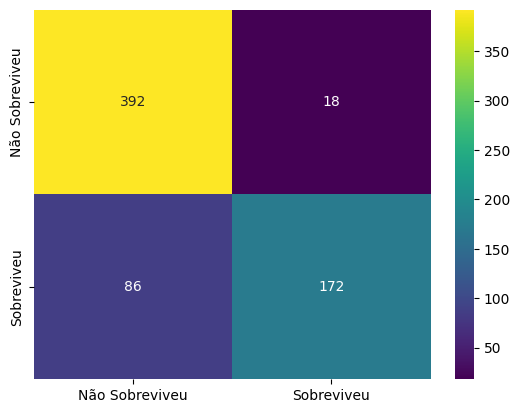

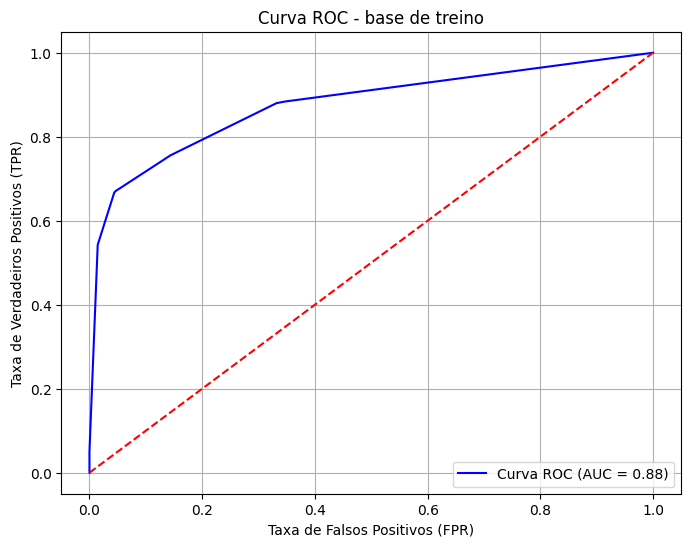

In [44]:
#%% Avaliando o modelo na base de treino

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train)

Avaliando a base de teste:

Base de treino:
A acurácia da árvore é: 78.0%
A acurácia balanceada da árvore é: 72.5%
AUC-ROC: 82.05%
GINI: 64.11%

               precision    recall  f1-score   support

       False       0.76      0.95      0.84       139
        True       0.86      0.50      0.63        84

    accuracy                           0.78       223
   macro avg       0.81      0.72      0.74       223
weighted avg       0.80      0.78      0.76       223



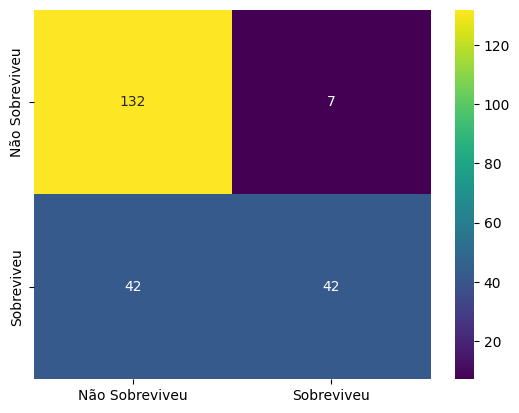

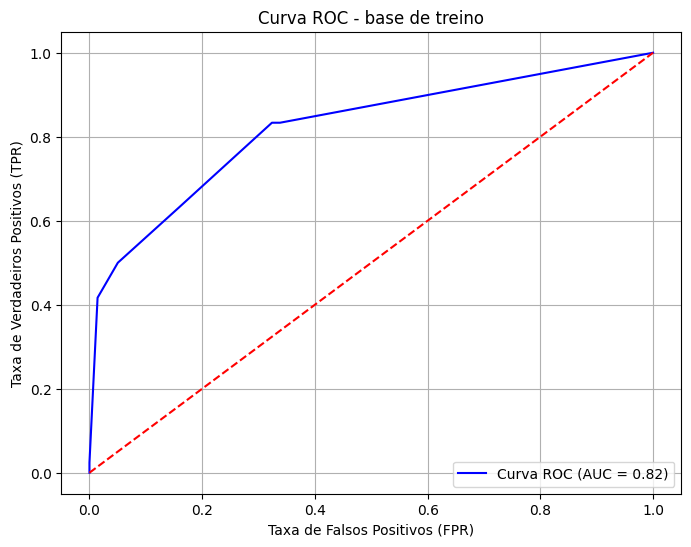

In [45]:
#%% Avaliando o modelo na base de teste
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test)

Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 98.7%
A acurácia balanceada da árvore é: 98.4%
AUC-ROC: 99.95%
GINI: 99.91%

               precision    recall  f1-score   support

       False       0.98      1.00      0.99       410
        True       0.99      0.97      0.98       258

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.99       668
weighted avg       0.99      0.99      0.99       668



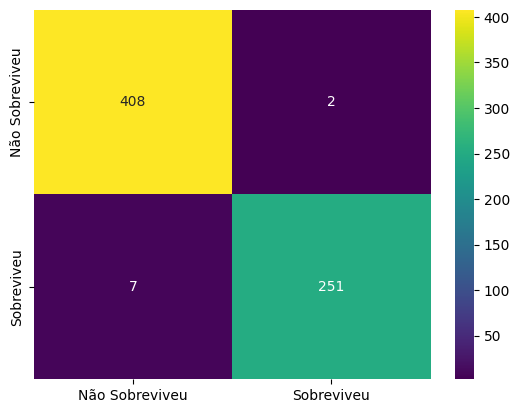

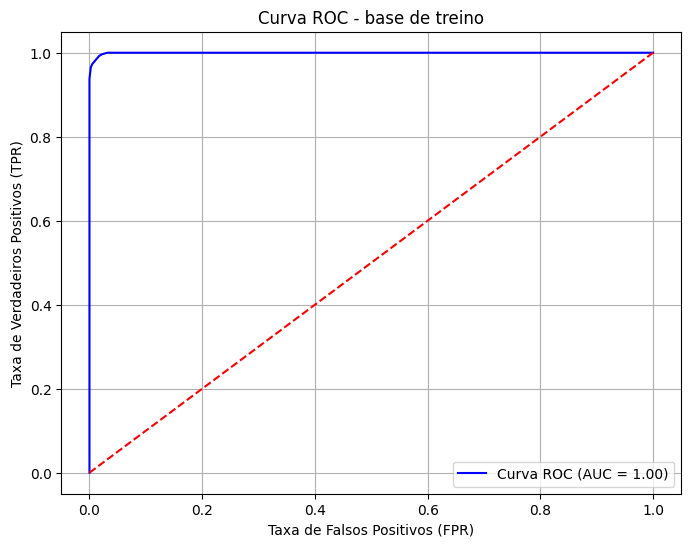

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 76.7%
A acurácia balanceada da árvore é: 74.7%
AUC-ROC: 74.86%
GINI: 49.72%

               precision    recall  f1-score   support

       False       0.80      0.83      0.82       139
        True       0.70      0.67      0.68        84

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.77      0.77       223



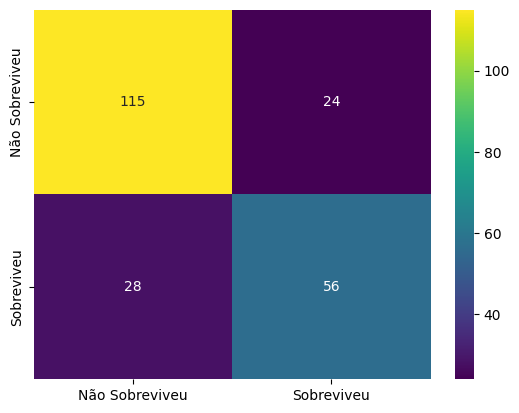

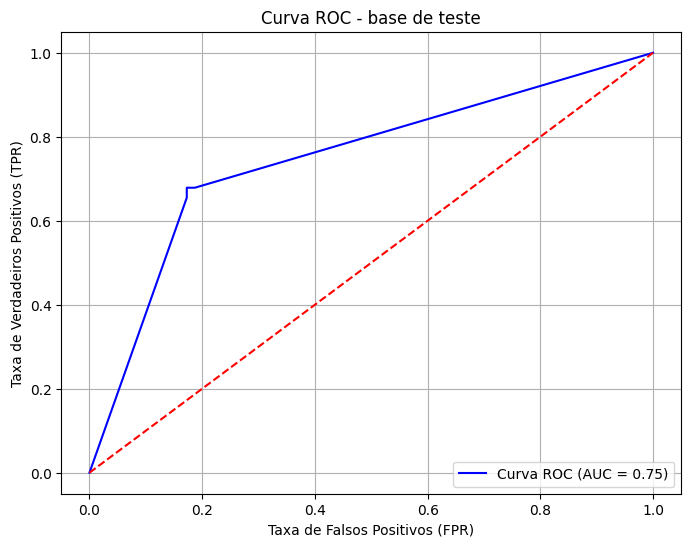

In [46]:
#%%  Deixando a árvore ser feliz

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=0)

# Treinar o modelo
arvore.fit(X_train, y_train)

#%% Avaliando o modelo na base de treino e teste

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

### Podando a árvore

In [47]:
#%% ccp_alpha

ccp_path = pd.DataFrame(arvore.cost_complexity_pruning_path(X_train, y_train))


O GINI máximo é de: 64.11%
Obtido com um ccp de: 0.006319920449175384


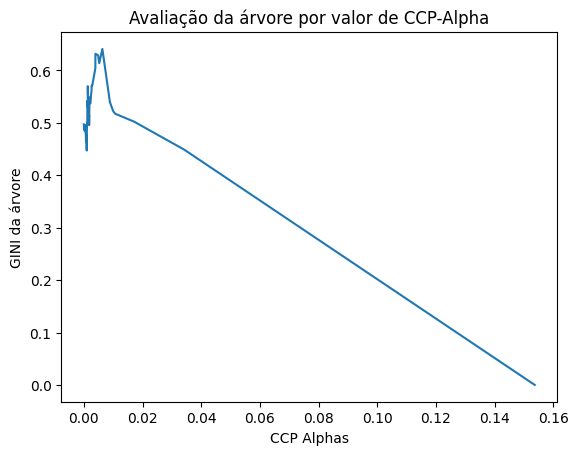

In [48]:
#%% Tunando a árvore

GINIs = []

for ccp in ccp_path['ccp_alphas']:
    arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                    random_state=42,
                                    ccp_alpha=ccp)

    # Treinar o modelo
    arvore.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

sns.lineplot(x = ccp_path['ccp_alphas'], y = GINIs)

df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

GINI_max = df_avaliacoes.GINI.max()
ccp_max  = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]

plt.ylabel('GINI da árvore')
plt.xlabel('CCP Alphas')
plt.title('Avaliação da árvore por valor de CCP-Alpha')

print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')

In [49]:

#%% Árvore ótima

arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=ccp_max).fit(X_train, y_train)



Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 84.4%
A acurácia balanceada da árvore é: 81.2%
AUC-ROC: 87.46%
GINI: 74.93%

               precision    recall  f1-score   support

       False       0.82      0.95      0.88       410
        True       0.90      0.67      0.77       258

    accuracy                           0.84       668
   macro avg       0.86      0.81      0.83       668
weighted avg       0.85      0.84      0.84       668



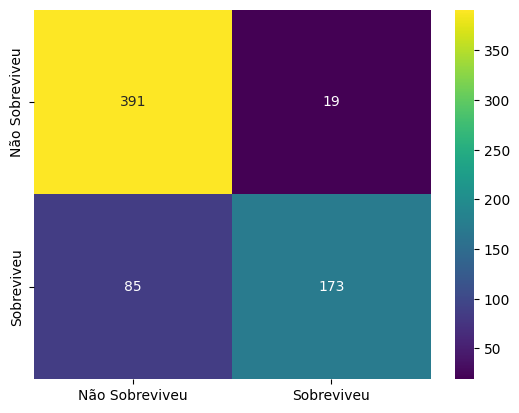

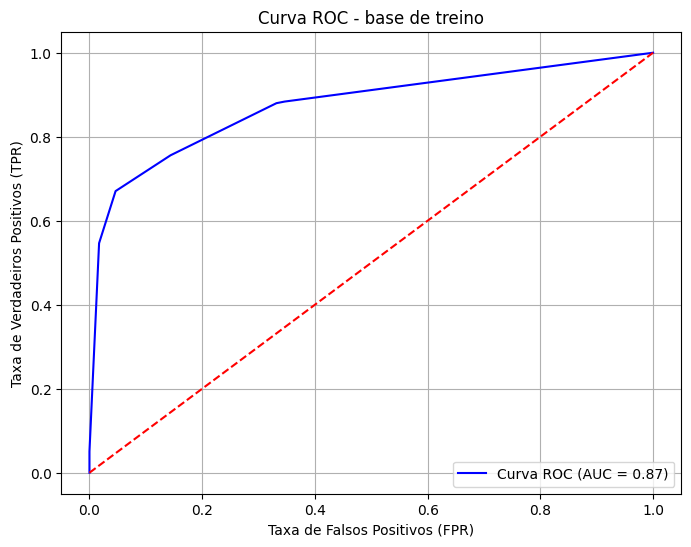

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 78.0%
A acurácia balanceada da árvore é: 72.5%
AUC-ROC: 82.05%
GINI: 64.11%

               precision    recall  f1-score   support

       False       0.76      0.95      0.84       139
        True       0.86      0.50      0.63        84

    accuracy                           0.78       223
   macro avg       0.81      0.72      0.74       223
weighted avg       0.80      0.78      0.76       223



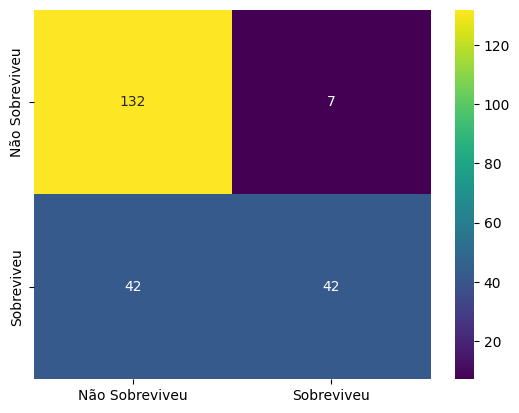

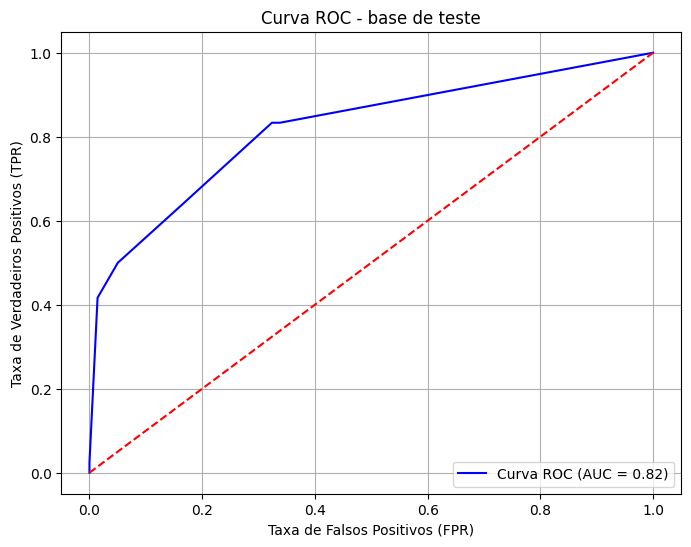

In [50]:
#%% avaliar

print('Avaliando a base de treino:')
avalia_clf(arvore, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore, y_test,X_test, base='teste')

## Aula 01 - Solução da lição de casa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               10000 non-null  int32  
 1   renda               10000 non-null  float64
 2   divida              10000 non-null  float64
 3   utilizacao_credito  10000 non-null  float64
 4   consultas_recentes  10000 non-null  float64
 5   inadimplencia       10000 non-null  int32  
 6   idade_cat           10000 non-null  float64
dtypes: float64(5), int32(2)
memory usage: 468.9 KB
None
   idade        renda       divida  utilizacao_credito  consultas_recentes  \
0     56  5001.087921  1999.455126             0.95862            4.875699   
1     69  5000.719625  2000.810295             1.00000            6.445579   
2     46  4999.716997  2001.196934             0.00000            5.101072   
3     32  5001.297920  2000.322691             0.69576            5.748065   
4    

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


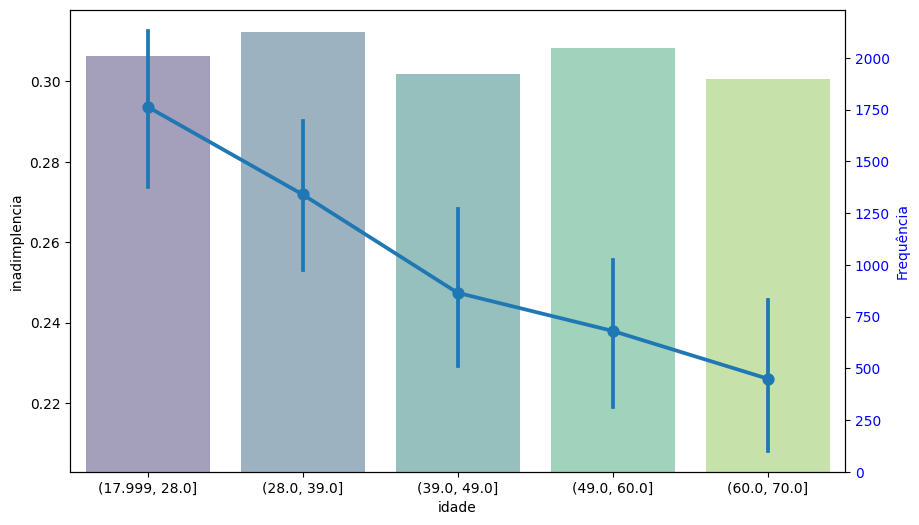

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


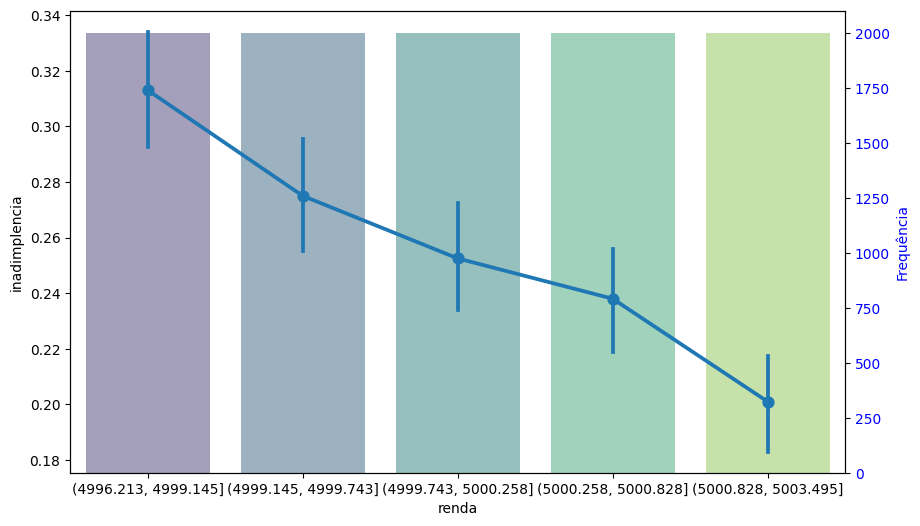

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


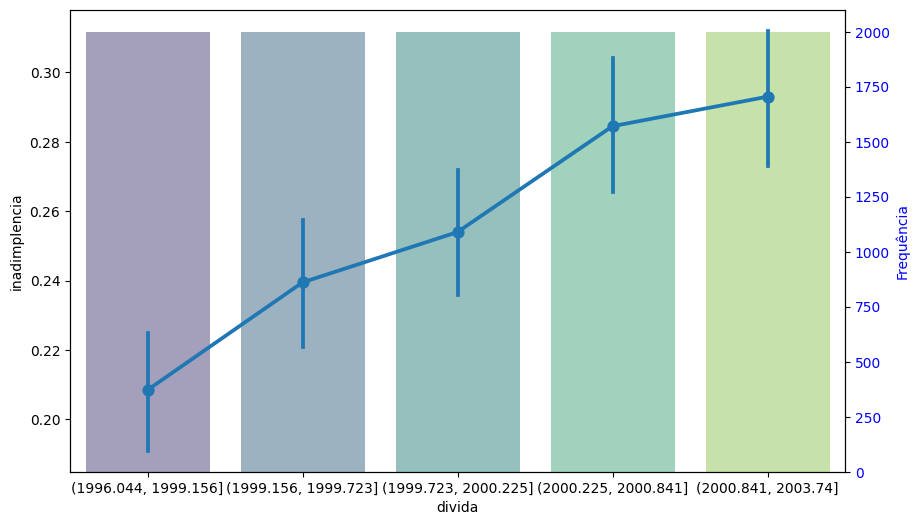

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


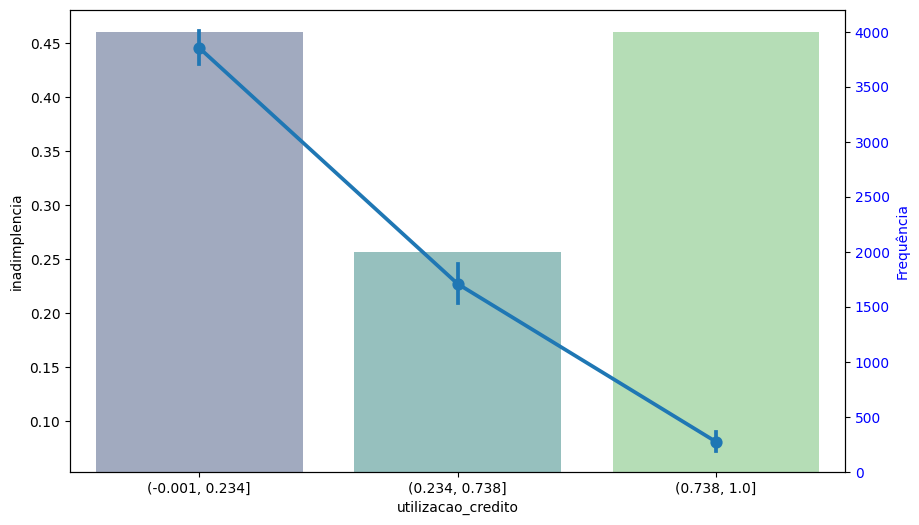

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


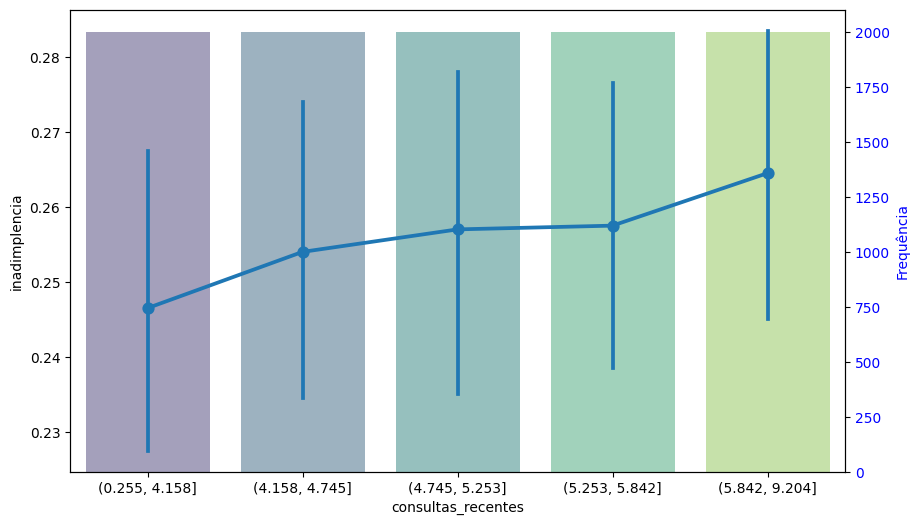

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


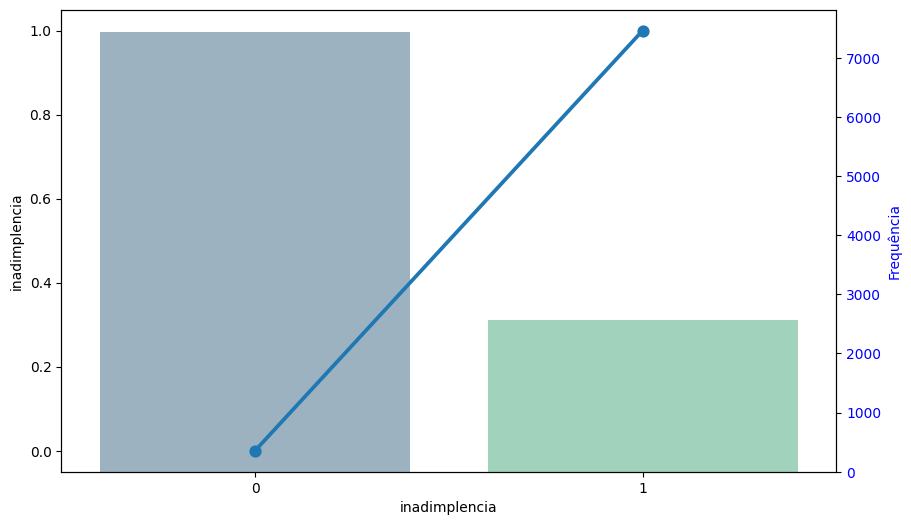

C:\Users\Lucas Rezende\Jupyter-Notebooks\MBA USP\Árvores, Redes e Ensemble Models I\funcoes_ajuda.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette='viridis', alpha=0.5, ax=ax2)


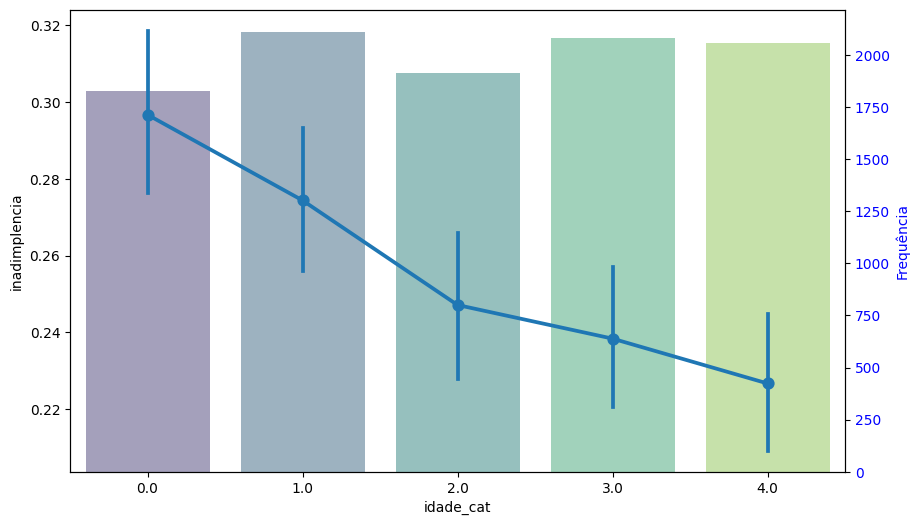

X_train shape: (8000, 6)
y_train shape: (8000,)
X_test shape: (2000, 6)
y_test shape: (2000,)

Base de treino:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5978
           1       1.00      1.00      1.00      2022

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



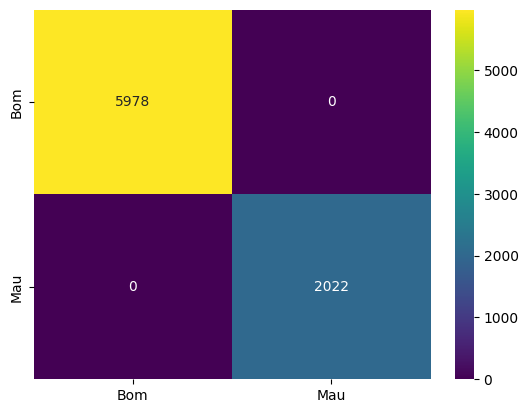

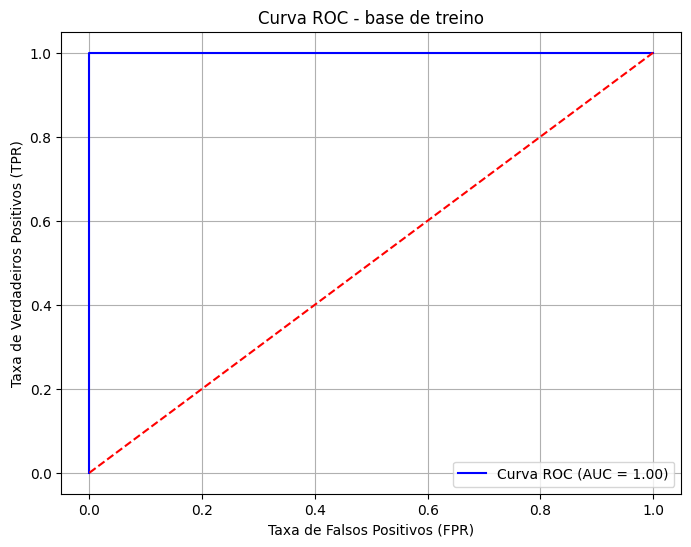


Base de teste:
A acurácia da árvore é: 68.2%
A acurácia balanceada da árvore é: 59.6%
AUC-ROC: 59.56%
GINI: 19.11%

               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1463
           1       0.41      0.41      0.41       537

    accuracy                           0.68      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.68      0.68      0.68      2000



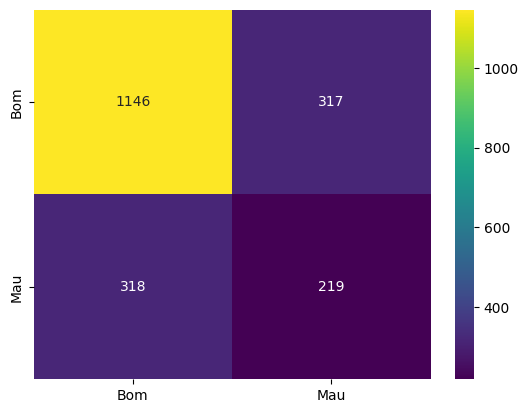

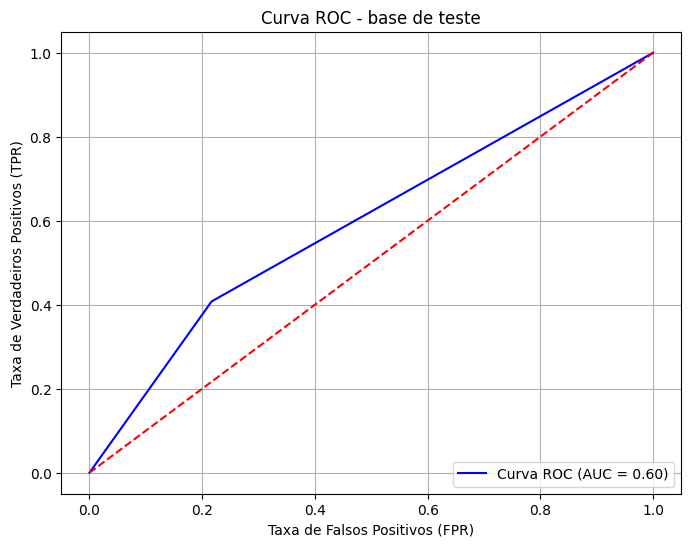

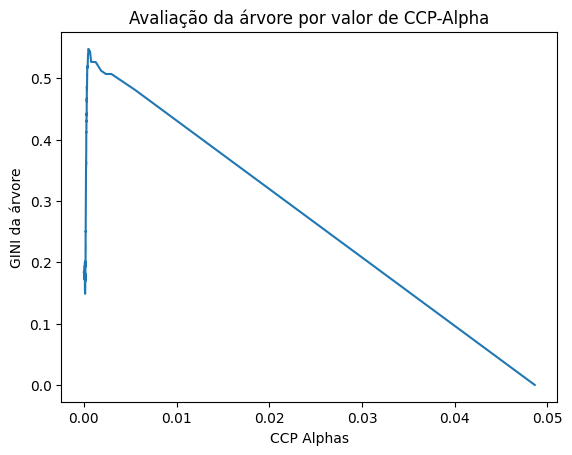

O GINI máximo é de: 54.78%
Obtido com um ccp de: 0.0005029846903724933
Avaliando a base de treino:

Base de treino:
A acurácia da árvore é: 76.7%
A acurácia balanceada da árvore é: 59.6%
AUC-ROC: 77.01%
GINI: 54.01%

               precision    recall  f1-score   support

           0       0.79      0.94      0.86      5978
           1       0.59      0.25      0.35      2022

    accuracy                           0.77      8000
   macro avg       0.69      0.60      0.60      8000
weighted avg       0.74      0.77      0.73      8000



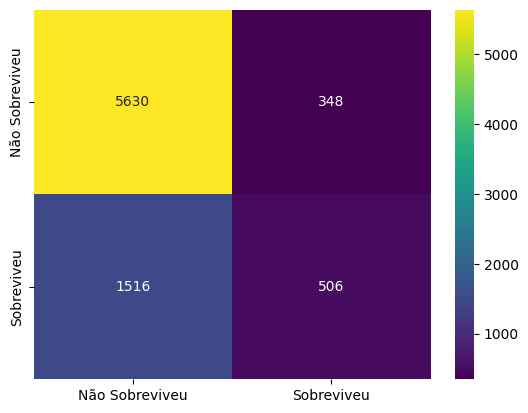

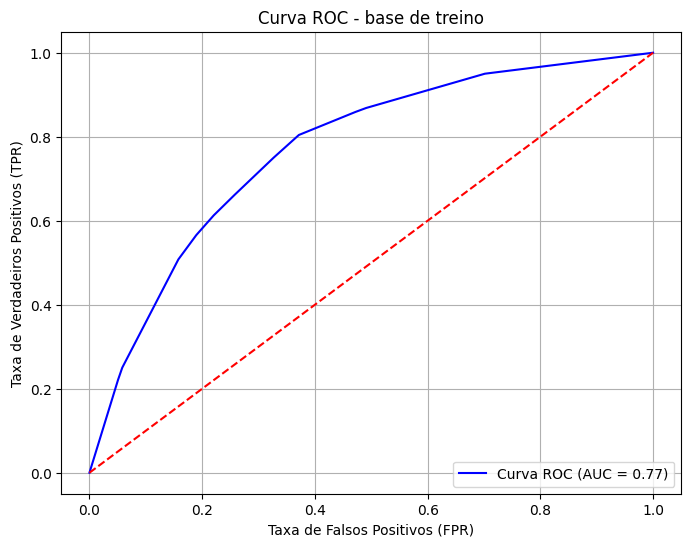

Avaliando a base de teste:

Base de teste:
A acurácia da árvore é: 75.3%
A acurácia balanceada da árvore é: 59.9%
AUC-ROC: 77.39%
GINI: 54.78%

               precision    recall  f1-score   support

           0       0.78      0.93      0.85      1463
           1       0.59      0.27      0.37       537

    accuracy                           0.75      2000
   macro avg       0.68      0.60      0.61      2000
weighted avg       0.73      0.75      0.72      2000



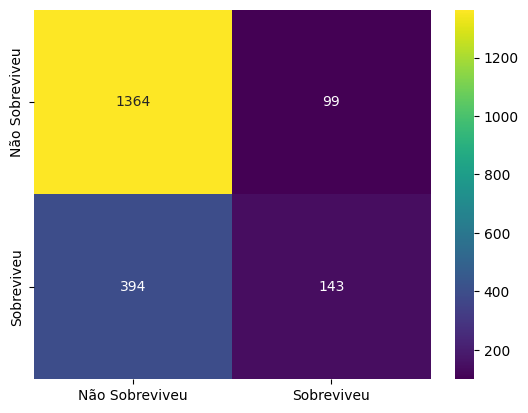

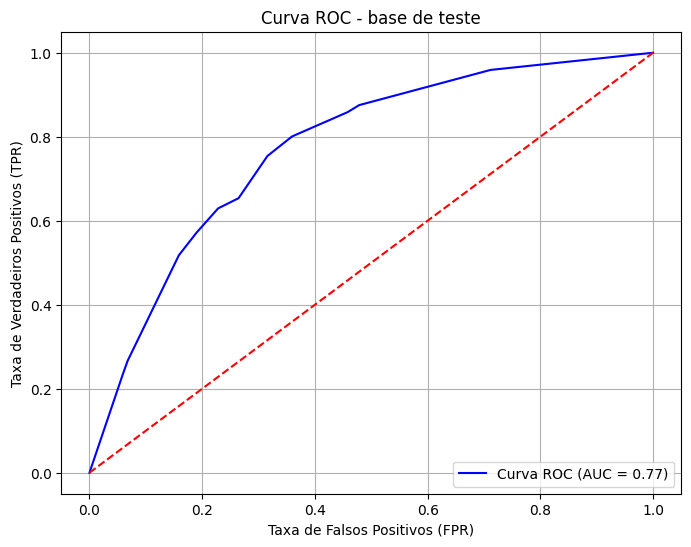

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jan 12 14:28:03 2025

@author: João Mello
"""

import pandas as pd
from funcoes_ajuda import descritiva, avalia_clf


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet('exercicio.parquet')

print(df.info())
print(df.head())

#%% Descritivas básicas

for var in df.columns:
    descritiva(df, var=var, vresp = 'inadimplencia')
    

#%% Separando treino e teste
y = df['inadimplencia']
X = df.drop('inadimplencia', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2360873)

# Imprima as formas dos conjuntos de dados resultantes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#%% Treinando o modelo

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#%% Avaliação base de treino
avalia_clf(clf, y_train, X_train, rótulos_y=['Bom', 'Mau'], base = 'treino')

#%% Avaliação base de teste
avalia_clf(clf, y_test, X_test, rótulos_y=['Bom', 'Mau'], base = 'teste')

#%% Obter os valores de CCF desta árvore
ccp_path = pd.DataFrame(clf.cost_complexity_pruning_path(X_train, y_train))

#%% Tunando a árvore

GINIs = []

for ccp in ccp_path['ccp_alphas']:
    arvore = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                    random_state=42,
                                    ccp_alpha=ccp)

    # Treinar o modelo
    arvore.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, arvore.predict_proba(X_test)[:, -1])
    GINI = (AUC-0.5)*2
    GINIs.append(GINI)

sns.lineplot(x = ccp_path['ccp_alphas'], y = GINIs)

df_avaliacoes = pd.DataFrame({'ccp': ccp_path['ccp_alphas'], 'GINI': GINIs})

GINI_max = df_avaliacoes.GINI.max()
ccp_max  = df_avaliacoes.loc[df_avaliacoes.GINI == GINI_max, 'ccp'].values[0]

plt.ylabel('GINI da árvore')
plt.xlabel('CCP Alphas')
plt.title('Avaliação da árvore por valor de CCP-Alpha')
plt.show()

print(f'O GINI máximo é de: {GINI_max:.2%}\nObtido com um ccp de: {ccp_max}')

#%% Árvore ótima

arvore_tunada = DecisionTreeClassifier(criterion='gini', max_depth = 30, 
                                random_state=42,
                                ccp_alpha=ccp_max).fit(X_train, y_train)


#%% avaliar

print('Avaliando a base de treino:')
avalia_clf(arvore_tunada, y_train,X_train, base='treino')
print('Avaliando a base de teste:')
avalia_clf(arvore_tunada, y_test,X_test, base='teste')

# Anotações e conceitos chave

## Acurácia balanceada 

É uma forma de dar pesos para as observações que são mais raras

## Índice de Gini

O **índice de Gini** é uma métrica usada em algoritmos de **árvores de decisão** para medir a **impureza** ou **heterogeneidade** de um nó. Ele ajuda a decidir a **melhor divisão** em cada passo do treinamento de uma árvore, separando os dados em subconjuntos mais homogêneos.

---

### **O que é o índice de Gini?**
No contexto de árvores de decisão, o índice de Gini mede o quão misturadas estão as classes dentro de um nó (ou grupo de dados). Ele varia entre **0 e 1**:
- **0:** Totalmente puro (todas as amostras pertencem à mesma classe).
- **1:** Máxima impureza (distribuição uniforme das classes).

O objetivo de uma árvore de decisão é encontrar divisões nos dados que **minimizem a impureza** (ou seja, deixem os nós mais puros).

---

### **Fórmula do índice de Gini**
Para um nó, o índice de Gini é calculado como:

\begin{equation}
Gini = 1 - \sum_{i=1}^{C} p_i^2
\end{equation}

- $C$: Número total de classes.
- $p_i$: Proporção das amostras pertencentes à classe $i$ no nó.

**Interpretação:**
- Se todas as amostras pertencem a uma única classe ($p_i = 1$ para uma classe e $p_i = 0$ para as outras), o índice de Gini será **0** (nó puro).
- Se as amostras estão igualmente distribuídas entre todas as classes ($p_i$ é igual para todas as classes), o índice de Gini será **alto**.

---

### **Como o índice de Gini é usado em árvores de decisão?**

1. **Divisões possíveis:** Durante o treinamento de uma árvore de decisão, o algoritmo testa diferentes divisões nos dados, separando-os com base nos valores das variáveis (features).
2. **Cálculo do Gini para cada divisão:** Para cada divisão, o índice de Gini é calculado para os **nós filhos** (grupos resultantes da divisão).
3. **Gini médio ponderado:** O índice de Gini da divisão é dado pela média ponderada dos índices de Gini dos nós filhos:
   \begin{equation}
   Gini_{\text{divisão}} = \frac{N_{esq}}{N} \cdot Gini_{esq} + \frac{N_{dir}}{N} \cdot Gini_{dir}
   \end{equation}
   - $N$: Número total de amostras no nó pai.
   - $N_{esq}$ e $N_{dir}$: Número de amostras nos nós esquerdo e direito.
4. **Escolha da melhor divisão:** O algoritmo escolhe a divisão que **minimiza o índice de Gini médio ponderado**, ou seja, que resulta em nós filhos mais homogêneos.

---

### **Exemplo Prático**
Suponha que você tenha um nó com 10 amostras:
- 6 são da classe $A$.
- 4 são da classe $B$.

O índice de Gini do nó é calculado como:
\begin{equation}
Gini = 1 - (p_A^2 + p_B^2)
\end{equation}
- $p_A = \frac{6}{10} = 0,6$
- $p_B = \frac{4}{10} = 0,4$

\begin{equation}
Gini = 1 - (0,6^2 + 0,4^2) = 1 - (0,36 + 0,16) = 1 - 0,52 = 0,48
\end{equation}

Agora, o algoritmo busca divisões (ex.: por uma feature $X$) que resultem em menores índices de Gini para os nós filhos.

---

### **Vantagens do Índice de Gini**
- É **simples de calcular** e eficiente em termos computacionais.
- Funciona bem para **problemas de classificação**, balanceando a divisão dos dados de forma a maximizar a pureza dos nós.

---

### **Índice de Gini vs. Entropia**
Outra métrica popular para medir impureza em árvores de decisão é a **entropia** (usada no algoritmo ID3). A diferença principal é:
- **Índice de Gini**: Focado na probabilidade de classificação errada.
- **Entropia**: Baseada no conceito de incerteza na teoria da informação (mais sensível a pequenas mudanças na distribuição).

Ambas são boas escolhas, e a preferência geralmente depende da implementação e do problema.


## Hiperparâmetros

São parâmetros que controlam o algoritmo como:
1. Número mínimo de observações por folha
2. Profundidade máxima
3. CP – Custo de complexidade